In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [53]:
# Load the dataset
df = pd.read_csv('customer_shopping_data.csv')

# Initial data inspection
print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB
None


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [ ]:

# Data cleaning
# Check for missing values
print(df.isnull().sum())

# Convert date to datetime format
df['invoice_date'] = pd.to_datetime(df['invoice_date'], dayfirst=True)

# Check for duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")
df = df.drop_duplicates()

# Verify cleaned data
print(df.info())

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64
Duplicate rows: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  float64       
 7   payment_method  99457 non-null  object        
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
dtypes: datetime64[ns](1), float64(1

In [55]:
# Calculate key metrics
# Total sales and average transaction value
df['total_sale'] = df['quantity'] * df['price']
total_sales = df['total_sale'].sum()
avg_transaction = df['total_sale'].mean()

print(f"Total Sales: {total_sales:,.2f} TL")
print(f"Average Transaction Value: {avg_transaction:,.2f} TL")

# Transactions per month
df['month_year'] = df['invoice_date'].dt.to_period('M')
transactions_per_month = df.groupby('month_year')['invoice_no'].nunique()

# Distribution by product category
category_dist = df['category'].value_counts(normalize=True) * 100

# Average quantity per transaction
avg_quantity = df['quantity'].mean()

# Payment method distribution
payment_dist = df['payment_method'].value_counts(normalize=True) * 100

# Demographic analysis
gender_dist = df['gender'].value_counts(normalize=True) * 100
age_stats = df['age'].describe()

# Shopping mall distribution
mall_dist = df['shopping_mall'].value_counts(normalize=True) * 100

# Display key statistics
print("\nKey Statistics:")
print(f"\nAverage quantity per transaction: {avg_quantity:.2f}")
print("\nProduct Category Distribution:")
print(category_dist)
print("\nPayment Method Distribution:")
print(payment_dist)
print("\nGender Distribution:")
print(gender_dist)
print("\nAge Statistics:")
print(age_stats)
print("\nShopping Mall Distribution:")
print(mall_dist)

Total Sales: 251,505,794.25 TL
Average Transaction Value: 2,528.79 TL

Key Statistics:

Average quantity per transaction: 3.00

Product Category Distribution:
category
Clothing           34.675287
Cosmetics          15.179424
Food & Beverage    14.856672
Toys               10.142071
Shoes              10.088782
Souvenir            5.026293
Technology          5.023276
Books               5.008194
Name: proportion, dtype: float64

Payment Method Distribution:
payment_method
Cash           44.689665
Credit Card    35.121711
Debit Card     20.188624
Name: proportion, dtype: float64

Gender Distribution:
gender
Female    59.806751
Male      40.193249
Name: proportion, dtype: float64

Age Statistics:
count    99457.000000
mean        43.427089
std         14.990054
min         18.000000
25%         30.000000
50%         43.000000
75%         56.000000
max         69.000000
Name: age, dtype: float64

Shopping Mall Distribution:
shopping_mall
Mall of Istanbul     20.051882
Kanyon             

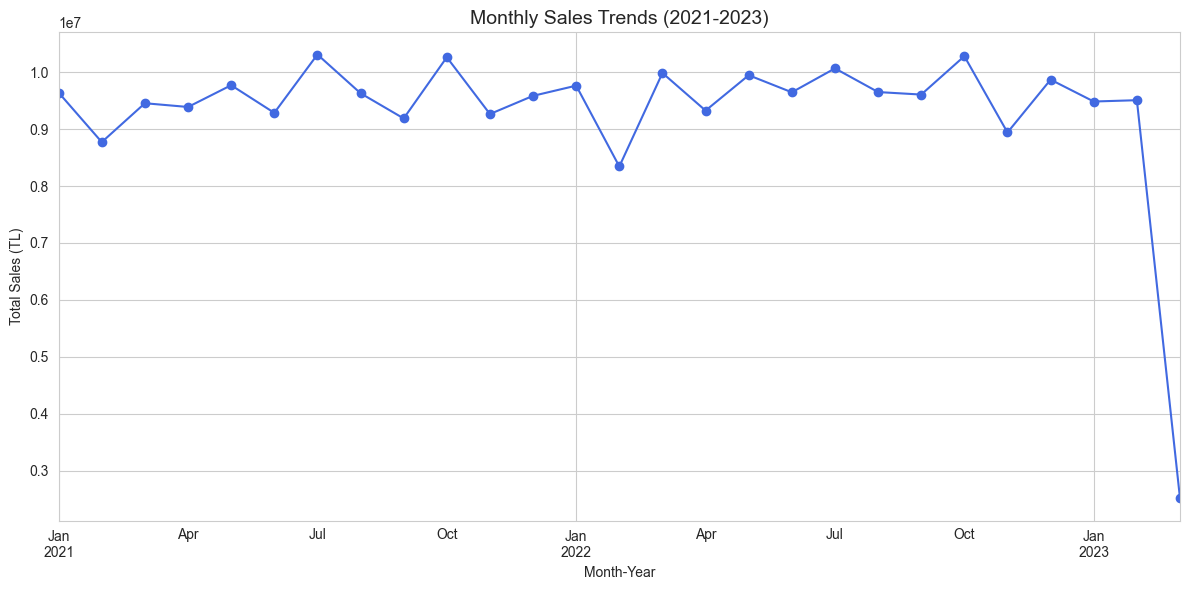

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5344\2016770482.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.values, y=category_sales.index, palette='viridis')


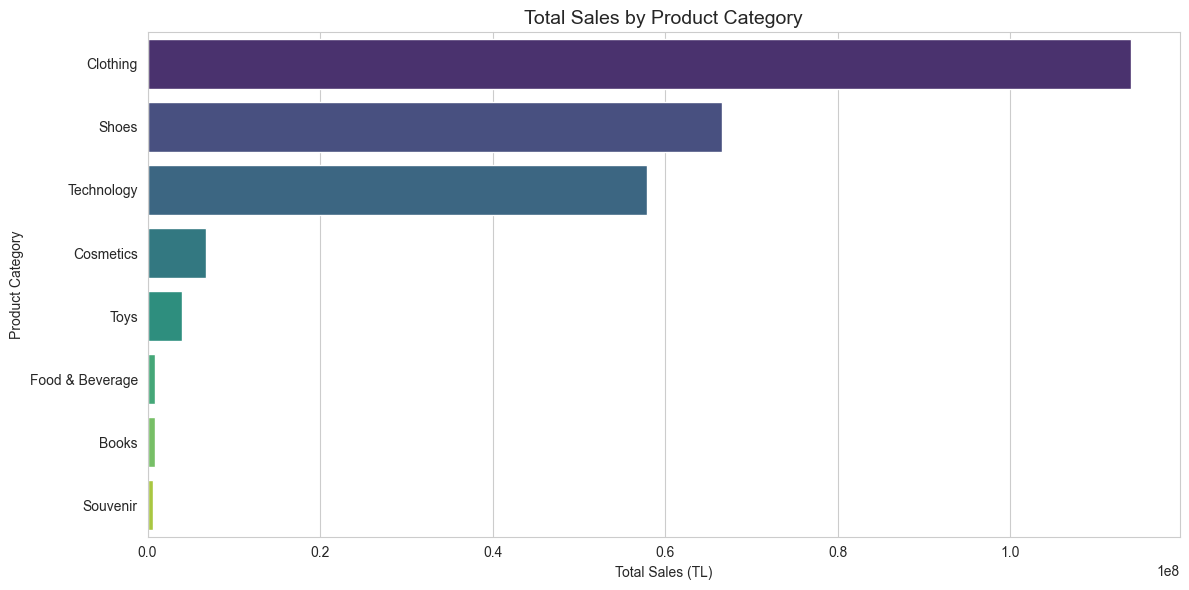

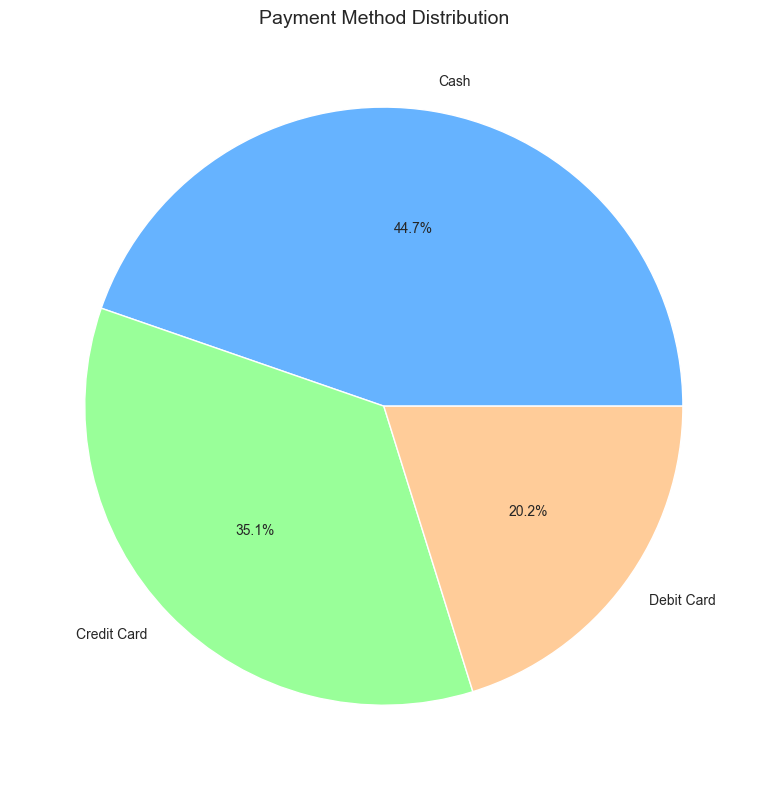

In [56]:
# Set style for visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# 1. Time series of sales trends
plt.figure(figsize=(12, 6))
monthly_sales = df.groupby('month_year')['total_sale'].sum()
monthly_sales.plot(kind='line', marker='o', color='royalblue')
plt.title('Monthly Sales Trends (2021-2023)', fontsize=14)
plt.ylabel('Total Sales (TL)')
plt.xlabel('Month-Year')
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Popular product categories
plt.figure(figsize=(12, 6))
category_sales = df.groupby('category')['total_sale'].sum().sort_values(ascending=False)
sns.barplot(x=category_sales.values, y=category_sales.index, palette='viridis')
plt.title('Total Sales by Product Category', fontsize=14)
plt.xlabel('Total Sales (TL)')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

# 3. Payment method share
plt.figure(figsize=(8, 8))
payment_dist.plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff','#99ff99','#ffcc99'])
plt.title('Payment Method Distribution', fontsize=14)
plt.ylabel('')
plt.tight_layout()
plt.show()


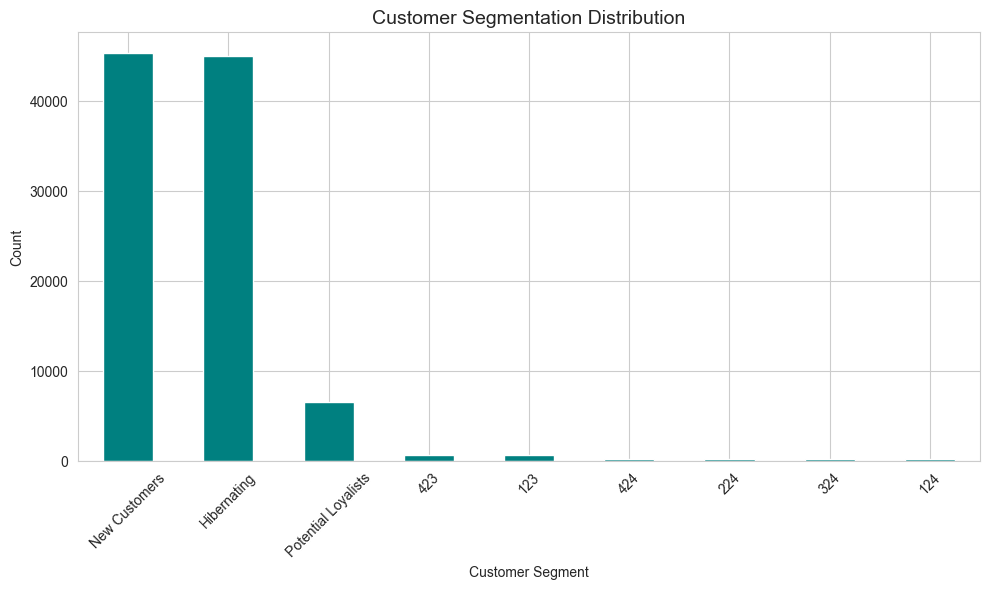

In [58]:
# RFM Analysis for customer segmentation
from datetime import datetime

# Set reference date (most recent invoice date + 1 day)
ref_date = df['invoice_date'].max() + pd.Timedelta(days=1)

# Calculate RFM metrics
rfm = df.groupby('customer_id').agg({
    'invoice_date': lambda x: (ref_date - x.max()).days,  # Recency
    'invoice_no': 'nunique',                              # Frequency
    'total_sale': 'sum'                                  # Monetary
}).rename(columns={
    'invoice_date': 'Recency',
    'invoice_no': 'Frequency',
    'total_sale': 'Monetary'
})

# Create segments
rfm['R_Score'] = pd.cut(rfm['Recency'], 4, labels=[4, 3, 2, 1], duplicates='drop')
rfm['F_Score'] = pd.cut(rfm['Frequency'], bins=4, labels=[1, 2, 3, 4], duplicates='drop')
rfm['M_Score'] = pd.cut(rfm['Monetary'], 4, labels=[1, 2, 3, 4], duplicates='drop')
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# Define segments
segment_map = {
    r'[4][4][4]': 'Champions',
    r'[3-4][3-4][3-4]': 'Loyal Customers',
    r'[2-3][2-3][2-3]': 'Potential Loyalists',
    r'[3-4][1-2][1-2]': 'New Customers',
    r'[1-2][3-4][3-4]': 'At Risk Customers',
    r'[1-2][1-2][1-2]': 'Hibernating'
}
rfm['Segment'] = rfm['RFM_Score'].replace(segment_map, regex=True)

# Visualize segments
plt.figure(figsize=(10, 6))
rfm['Segment'].value_counts().plot(kind='bar', color='teal')
plt.title('Customer Segmentation Distribution', fontsize=14)
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [63]:
# Generate insights programmatically
df['month'] = df['invoice_date'].dt.month
heatmap_data = df.pivot_table(values='total_sale', index='shopping_mall', 
                            columns='month', aggfunc='sum', fill_value=0)

peak_period = monthly_sales.idxmax().strftime('%B %Y')
top_category = category_sales.idxmax()
top_payment = payment_dist.idxmax()
busiest_month = df['month'].value_counts().idxmax()
weekend_sales = df[df['invoice_date'].dt.dayofweek >= 5]['total_sale'].sum()
weekday_sales = df[df['invoice_date'].dt.dayofweek < 5]['total_sale'].sum()

# Print key insights
print("\n=== Key Insights ===")
print(f"1. Peak shopping period: {peak_period}")
print(f"2. Top product category: {top_category} ({category_sales.max():,.0f} TL)")
print(f"3. Preferred payment method: {top_payment} ({payment_dist.max():.1f}%)")
print(f"4. Busiest shopping month: {busiest_month}:00")
print(f"5. Weekend vs Weekday sales: {weekend_sales/weekday_sales:.1%} higher on weekends")
print("\nCustomer Segmentation Highlights:")
print(rfm['Segment'].value_counts())


=== Key Insights ===
1. Peak shopping period: July 2021
2. Top product category: Clothing (113,996,791 TL)
3. Preferred payment method: Cash (44.7%)
4. Busiest shopping month: 1:00
5. Weekend vs Weekday sales: 39.2% higher on weekends

Customer Segmentation Highlights:
Segment
New Customers          45402
Hibernating            44997
Potential Loyalists     6563
423                      769
123                      725
424                      276
224                      245
324                      241
124                      239
Name: count, dtype: int64
